In [145]:

import numpy as np

import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents


import folium
from IPython.display import display
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
!pip install geocoder


import matplotlib.pyplot as plt
%matplotlib inline

import csv
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import folium
import math
#import warnings
#warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-145-45789f5db349>:36: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<h2>Data Scraping</h2>

In [2]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/Districts_of_Sri_Lanka"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

In [4]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

       District  Area map       Province Districtcapital  \
0  Ampara       NaN        Eastern        Ampara           
1  Anuradhapura NaN        North Central  Anuradhapura     
2  Badulla      NaN        Uva            Badulla          
3  Batticaloa   NaN        Eastern        Batticaloa       
4  Colombo      NaN        Western        Colombo          

  Landareain km2 (mi2)[24] Inlandwaterareain km2 (mi2)[24]  \
0  4,222 (1,630)            193 (75)                         
1  6,664 (2,573)            515 (199)                        
2  2,827 (1,092)            34 (13)                          
3  2,610 (1,010)            244 (94)                         
4  676 (261)                23 (8.9)                         

  Totalareain km2 (mi2)[24]  Population(2012)[25]  \
0  4,415 (1,705)             649402                 
1  7,179 (2,772)             860575                 
2  2,861 (1,105)             815405                 
3  2,854 (1,102)             526567                 
4

In [5]:
# drop the unwanted columns
data = df.drop(["Area map", "Districtcapital",   "Landareain km2 (mi2)[24]", "Inlandwaterareain km2 (mi2)[24]", "Totalareain km2 (mi2)[24]"], axis=1)
# rename columns for ease
data = data.rename(columns={" Totalareain km2": "Total Land Area","Population(2012)[25]": "Population","Populationdensityper km2(per mi2)[a]": "Population Density"})

#Drop last row of the dataframe
data.drop(df.tail(1).index,inplace=True) # drop last n rows
print(data)

        District       Province  Population Population Density
0   Ampara        Eastern        649402      154 (400)        
1   Anuradhapura  North Central  860575      129 (330)        
2   Badulla       Uva            815405      288 (750)        
3   Batticaloa    Eastern        526567      202 (520)        
4   Colombo       Western        2324349     3,438 (8,900)    
5   Galle         Southern       1063334     658 (1,700)      
6   Gampaha       Western        2304833     1,719 (4,450)    
7   Hambantota    Southern       599903      240 (620)        
8   Jaffna        Northern       583882      629 (1,630)      
9   Kalutara      Western        1221948     775 (2,010)      
10  Kandy         Central        1375382     716 (1,850)      
11  Kegalle       Sabaragamuwa   840648      499 (1,290)      
12  Kilinochchi   Northern       113510      94 (240)         
13  Kurunegala    North Western  1618465     350 (910)        
14  Mannar        Northern       99570       53 (140)  

In [6]:
#to check if all NaN values are removed from dataset

is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

        District  Area map       Province Districtcapital  \
0   Ampara       NaN        Eastern        Ampara           
1   Anuradhapura NaN        North Central  Anuradhapura     
2   Badulla      NaN        Uva            Badulla          
3   Batticaloa   NaN        Eastern        Batticaloa       
4   Colombo      NaN        Western        Colombo          
5   Galle        NaN        Southern       Galle            
6   Gampaha      NaN        Western        Gampaha          
7   Hambantota   NaN        Southern       Hambantota       
8   Jaffna       NaN        Northern       Jaffna           
9   Kalutara     NaN        Western        Kalutara         
10  Kandy        NaN        Central        Kandy            
11  Kegalle      NaN        Sabaragamuwa   Kegalle          
12  Kilinochchi  NaN        Northern       Kilinochchi      
13  Kurunegala   NaN        North Western  Kurunegala       
14  Mannar       NaN        Northern       Mannar           
15  Matale       NaN    

<h2>Data Analysis</h2>

<BarContainer object of 25 artists>

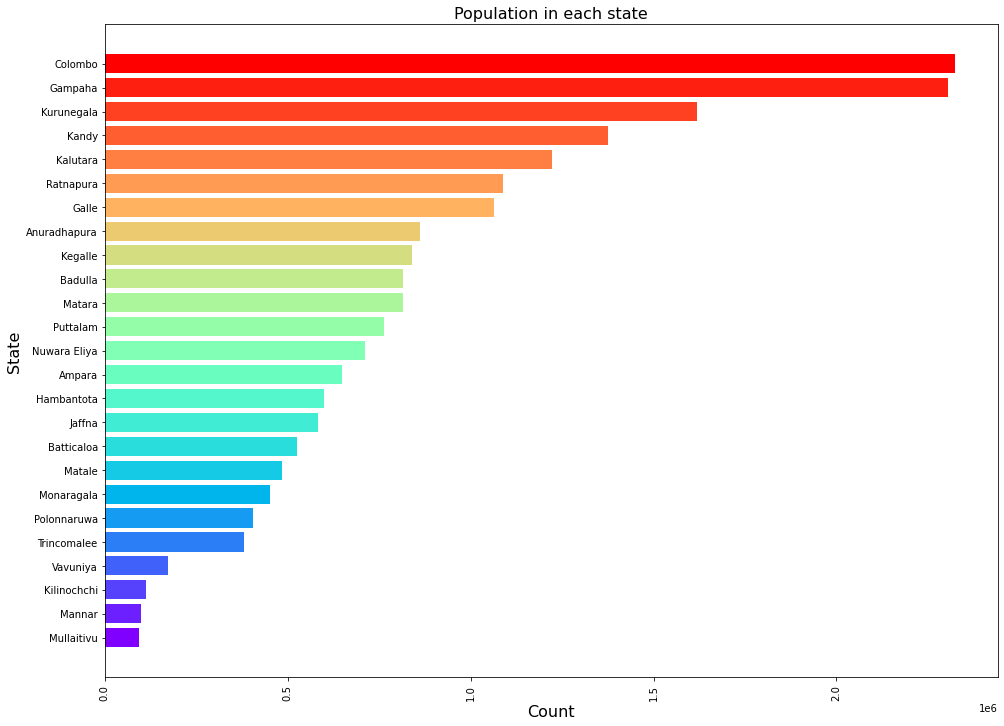

In [7]:
data.sort_values('Population',inplace=True)
population = data['Population']
state = data['District']


colors = cm.rainbow(np.linspace(0, 1, len(population.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("State", fontsize = 16)
plt.title("Population in each state", fontsize = 16)
plt.barh(state, population.values, color = colors)

In [8]:
print('The data has {} Districts'.format(len(data['District'].unique())))

The data has 25 Districts


In [10]:
print('The Districts are - ' + str(list(data['District'].unique())))

The Districts are - ['Mullaitivu', 'Mannar', 'Kilinochchi', 'Vavuniya', 'Trincomalee', 'Polonnaruwa', 'Monaragala', 'Matale', 'Batticaloa', 'Jaffna', 'Hambantota', 'Ampara', 'Nuwara Eliya', 'Puttalam', 'Matara', 'Badulla', 'Kegalle', 'Anuradhapura', 'Galle', 'Ratnapura', 'Kalutara', 'Kandy', 'Kurunegala', 'Gampaha', 'Colombo']


In [9]:
state = input('Enter a State - ')
province = state.capitalize()


Enter a State - Western


In [17]:
#dataframe containing only the state which is input by the user
df_user_Province = data[data['Province']==province].reset_index(drop=True)
df_user_Province.head()

,District,Province,Population,Population Density
0,Kalutara,Western,1221948,"775 (2,010)"
1,Gampaha,Western,2304833,"1,719 (4,450)"
2,Colombo,Western,2324349,"3,438 (8,900)"


In [35]:
location = [x for x in data['District'].unique().tolist() 
            if type(x) == str]
latitude = []
longitude =  []
for i in range(0, len(location)):
    # remove things that does not seem usefull here
    try:
        address = location[i] + ',Sri Lanka'
        geolocator = Nominatim(user_agent="ny_explorer")
        loc = geolocator.geocode(address)
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
      #  print('The geographical coordinate of location are {}, {}.'.format(loc.latitude, loc.longitude))
    except:
        # in the case the geolocator does not work, then add nan element to list
        # to keep the right size
        latitude.append(np.nan)
        longitude.append(np.nan)
# create a dataframe with the locatio, latitude and longitude
df_ = pd.DataFrame({'District':location, 
                    'District_latitude': latitude,
                    'District_longitude':longitude})
df_
# merge on Location with rest_df to get the column 
new_df = data.merge(df_, on='District', how='left')
new_df

,District,Province,Population,Population Density,District_latitude,District_longitude
0,Mullaitivu,Northern,92238,38 (98),9.269853,80.814535
1,Mannar,Northern,99570,53 (140),8.977244,79.913779
2,Kilinochchi,Northern,113510,94 (240),9.384007,80.408722
3,Vavuniya,Northern,172115,92 (240),8.759352,80.500078
4,Trincomalee,Eastern,379541,150 (390),8.576425,81.234495
5,Polonnaruwa,North Central,406088,132 (340),7.939536,81.000339
6,Monaragala,Uva,451058,82 (210),6.902200,81.347838
7,Matale,Central,484531,248 (640),7.472045,80.623431
8,Batticaloa,Eastern,526567,202 (520),7.735603,81.694196
9,Jaffna,Northern,583882,"629 (1,630)",9.665093,80.009303


In [61]:
import folium
from IPython.display import display

#map of State using latitude and longitude values
map_state = folium.Map(location=[latitude, longitude], zoom_start=7)


# add markers to map
for lat, lng, st, district in zip(new_df['District_latitude'], new_df['District_longitude'], new_df['Province'], new_df['District']):
    label = '{}, {}'.format(district, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    print(lat,lng,st,district)

display(map_state)
    


9.2698532 80.8145347 Northern Mullaitivu
8.9772444 79.9137786 Northern Mannar
9.3840068 80.4087224 Northern Kilinochchi
8.7593517 80.5000778 Northern Vavuniya
8.576425 81.2344952 Eastern Trincomalee
7.9395357 81.0003387 North Central Polonnaruwa
6.9021996 81.3478376 Uva Monaragala
7.4720453 80.6234307 Central Matale
7.7356027 81.6941956 Eastern Batticaloa
9.665093 80.0093029 Northern Jaffna
6.1249126 81.1242563 Southern Hambantota
7.2978118 81.6790194 Eastern Ampara
6.9738863 80.767127 Central Nuwara Eliya
8.0301856 79.8286583 North Western Puttalam
5.947822 80.5482919 Southern Matara
6.9898202 81.0569425 Uva Badulla
7.2532006 80.3454132 Sabaragamuwa Kegalle
8.334985 80.4106096 North Central Anuradhapura
6.0328139 80.214955 Southern Galle
6.6803691 80.4022975 Sabaragamuwa Ratnapura
6.5835219 79.9612508 Western Kalutara
7.2930922 80.6350768 Central Kandy
7.4870464 80.364908 North Western Kurunegala
7.0925595 79.9951396 Western Gampaha
6.9349969 79.8538463 Western Colombo


In [49]:
import folium
from IPython.display import display
LDN_COORDINATES = (7.8731, 80.7718)
myMap = folium.Map(location=LDN_COORDINATES, zoom_start=7)
display(myMap)

<h2>FourSquare API</h2>

<b>Define Foursquare Credentials and Version

In [62]:
CLIENT_ID = 'EM1DPOY2TSWUIQJJQ42LCCT3XY4SLA0KCOWZU0DHQTZR3DOT' # your Foursquare ID
CLIENT_SECRET = 'EBUWTCYITSH2GLCPIKEPC1WY1GT4GY4Y5DDYRZP5ACLEDROY' # your Foursquare Secret
VERSION = '20201229' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EM1DPOY2TSWUIQJJQ42LCCT3XY4SLA0KCOWZU0DHQTZR3DOT
CLIENT_SECRET:EBUWTCYITSH2GLCPIKEPC1WY1GT4GY4Y5DDYRZP5ACLEDROY


<b>We need to retrieve only tourist places. Let's check all the categories present in Foursquare API

In [63]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()
category_results

{'meta': {'code': 200, 'requestId': '5fec47b7d547f51ffb9f92e4'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [64]:
#Lets check number of main categories and sub-categories present in Foursquare API

categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(venues)
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']
        print('\t\t' + sub_venues)

Arts & Entertainment
		Amphitheater
		Aquarium
		Arcade
		Art Gallery
		Bowling Alley
		Casino
		Circus
		Comedy Club
		Concert Hall
		Country Dance Club
		Disc Golf
		Escape Room
		Exhibit
		General Entertainment
		Go Kart Track
		Historic Site
		Karaoke Box
		Laser Tag
		Memorial Site
		Mini Golf
		Movie Theater
		Museum
		Music Venue
		Pachinko Parlor
		Performing Arts Venue
		Pool Hall
		Public Art
		Racecourse
		Racetrack
		Roller Rink
		Salsa Club
		Samba School
		Stadium
		Theme Park
		Tour Provider
		VR Cafe
		Water Park
		Zoo
College & University
		College Academic Building
		College Administrative Building
		College Auditorium
		College Bookstore
		College Cafeteria
		College Classroom
		College Gym
		College Lab
		College Library
		College Quad
		College Rec Center
		College Residence Hall
		College Stadium
		College Theater
		Community College
		Fraternity House
		General College & University
		Law School
		Medical School
		Sorority House
		Student Center
		Trade School
		U

In [65]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


<h2>Get the required Catgories </h2>

In [66]:
tourist_category = []
business_category = []
req_categories = ['Arts & Entertainment', 'Nightlife Spot', 'Outdoors & Recreation']
req_categories2 = ['Food', 'Shop & Service', 'Travel & Transport']


for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in req_categories2:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

In [67]:
#remove unwanted categories from tourist list
tourist_category.remove('Lounge')
tourist_category.remove('Movie Theater')
tourist_category.remove('Bar')

#remove unwanted categories from business list
business_category.remove('Bus Station')
business_category.remove('ATM')
business_category.remove('Train Station')
business_category.remove('Bus Stop')
business_category.remove('Light Rail Station')
business_category.remove('Toll Booth')
business_category.remove('Toll Plaza')
business_category.remove('Tram Station')

<b>Function to get the nearby venues of all the districts in the Province
    

In [69]:
LIMIT = 25

def getNearbyVenues_tourist(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(tourist_category)]
    
    return(nearby_venues)

In [72]:
state_venues = getNearbyVenues_tourist(names=new_df['District'],
                                   latitudes=new_df['District_latitude'],
                                   longitudes=new_df['District_longitude']
                                  )

Mullaitivu
Mannar
Kilinochchi
Vavuniya
Trincomalee
Polonnaruwa
Monaragala
Matale
Batticaloa
Jaffna
Hambantota
Ampara
Nuwara Eliya
Puttalam
Matara
Badulla
Kegalle
Anuradhapura
Galle
Ratnapura
Kalutara
Kandy
Kurunegala
Gampaha
Colombo


In [73]:
print(state_venues.shape)
state_venues

(133, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mullaitivu,9.269853,80.814535,Iranamadu Tank,9.344425,80.437398,Lake
4,Mannar,8.977244,79.913779,Mannar Fort,8.975699,79.917046,Historic Site
6,Mannar,8.977244,79.913779,Yoda Wewa,8.868188,80.015597,Lake
7,Mannar,8.977244,79.913779,Thalaimannar Light house,9.107326,79.731139,Lighthouse
8,Kilinochchi,9.384007,80.408722,Iranamadu Tank,9.344425,80.437398,Lake
9,Kilinochchi,9.384007,80.408722,Maamunai Beach,9.662819,80.364020,Beach
12,Kilinochchi,9.384007,80.408722,Manalkaadu,9.778540,80.273916,Beach
14,Kilinochchi,9.384007,80.408722,Mullaitiv Beach,9.268846,80.819480,Beach
17,Vavuniya,8.759352,80.500078,Ruwanvelisaya Temple (රුවන්වැලිසෑය),8.350087,80.397710,Historic Site
18,Vavuniya,8.759352,80.500078,Sri Maha Bodhi (ජය ශ්රි මහා බොධිය),8.344787,80.397209,Historic Site


In [74]:
all_venues = state_venues['Venue'].tolist()
len(all_venues)

133

In [75]:
no_venues_in_district = state_venues.groupby('District', as_index=False).count()
no_venues_in_district = no_venues_in_district[['District','Venue']]
no_venues_in_district.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_in_district

,District,No of Venues
0,Ampara,2
1,Anuradhapura,10
2,Badulla,10
3,Batticaloa,6
4,Colombo,2
5,Galle,4
6,Gampaha,1
7,Hambantota,2
8,Jaffna,5
9,Kalutara,7


In [76]:
max_no_of_venues = no_venues_in_district['No of Venues'].max()
max_no_of_venues

13

<h2>Count number of Tourist Attraction retrieved in each District</h2>

<BarContainer object of 25 artists>

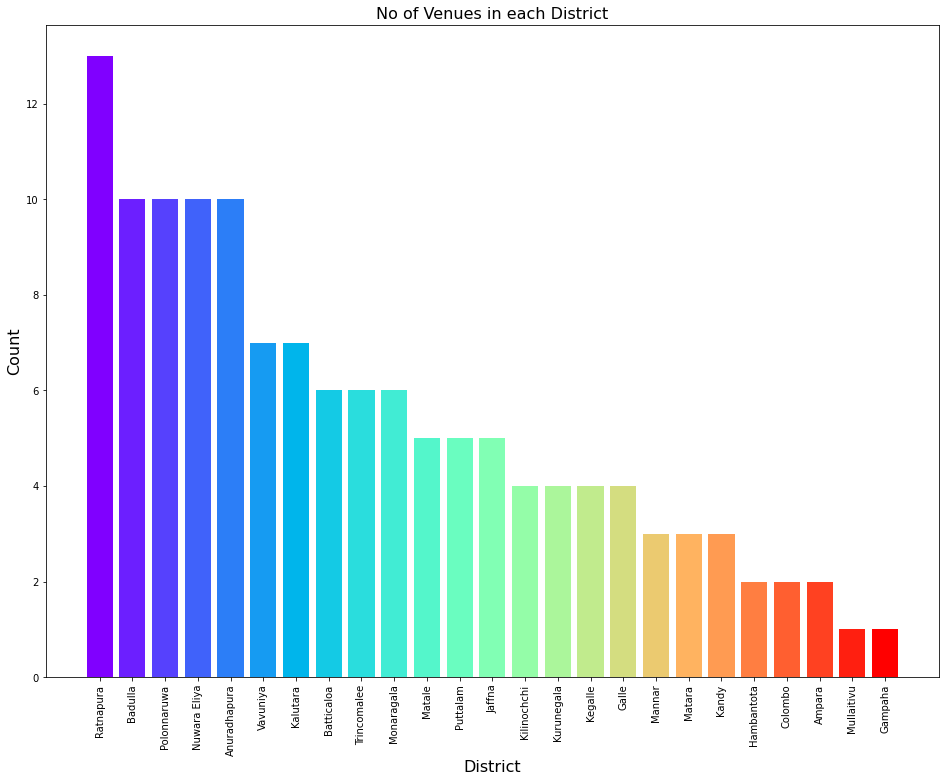

In [78]:
no_venues_in_district.sort_values('No of Venues', ascending=False, inplace=True)
venues = no_venues_in_district['No of Venues']
district = no_venues_in_district['District']


colors = cm.rainbow(np.linspace(0, 1, len(venues.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Venues in each District", fontsize = 16)
plt.bar(district, venues.values, color = colors)

<b>Unique categories curated from all the returned venues

In [79]:
print('There are {} uniques categories.'.format(len(state_venues['Venue Category'].unique())))

There are 27 uniques categories.


In [80]:
#print unique venue categories
state_venues['Venue Category'].unique()

array(['Lake', 'Historic Site', 'Lighthouse', 'Beach',
       'Rock Climbing Spot', 'Park', 'Nature Preserve', 'Mountain',
       'Bridge', 'Scenic Lookout', 'Other Great Outdoors', 'Waterfall',
       'Botanical Garden', 'Pool', 'National Park', 'Zoo', 'Stables',
       'Museum', 'Athletics & Sports', 'Recreation Center', 'River',
       'Trail', 'Racetrack', 'Campground', 'Castle', 'Water Park',
       'Garden'], dtype=object)

<h2>Analyze Each District</h2>

In [81]:
# one hot encoding
state_venues_onehot = pd.get_dummies(state_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
state_venues_onehot['District'] = state_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [state_venues_onehot.columns[-1]] + list(state_venues_onehot.columns[:-1])
state_venues_onehot = state_venues_onehot[fixed_columns]

state_venues_onehot.head()

,District,Athletics & Sports,Beach,Botanical Garden,Bridge,Campground,Castle,Garden,Historic Site,Lake,Lighthouse,Mountain,Museum,National Park,Nature Preserve,Other Great Outdoors,Park,Pool,Racetrack,Recreation Center,River,Rock Climbing Spot,Scenic Lookout,Stables,Trail,Water Park,Waterfall,Zoo
0,Mullaitivu,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Mannar,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Mannar,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Mannar,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Kilinochchi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
state_venues_onehot.shape

(133, 28)

<b>Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [84]:
state_venues_grouped = state_venues_onehot.groupby('District').mean().reset_index()
state_venues_grouped

,District,Athletics & Sports,Beach,Botanical Garden,Bridge,Campground,Castle,Garden,Historic Site,Lake,Lighthouse,Mountain,Museum,National Park,Nature Preserve,Other Great Outdoors,Park,Pool,Racetrack,Recreation Center,River,Rock Climbing Spot,Scenic Lookout,Stables,Trail,Water Park,Waterfall,Zoo
0,Ampara,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,Anuradhapura,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.100000,0.000000,0.000000,0.0,0.100000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,Badulla,0.0,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.0,0.200000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.400000,0.0,0.000000,0.000000,0.100000,0.0
3,Batticaloa,0.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.166667,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,Colombo,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.500000,0.000000,0.0
5,Galle,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
6,Gampaha,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
7,Hambantota,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.5
8,Jaffna,0.0,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.200000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
9,Kalutara,0.0,0.285714,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.142857,0.000000,0.0,0.000000,0.0,0.142857,0.000000,0.000000,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [85]:
state_venues_grouped.shape


(25, 28)

<b>Print each District along with the top 5 most common venues

In [87]:
num_top_venues = max_no_of_venues

for hood in state_venues_grouped['District']:
    print("----"+hood+"----")
    temp = state_venues_grouped[state_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ampara----
                   venue  freq
0   Park                  0.5 
1   Beach                 0.5 
2   Athletics & Sports    0.0 
3   Other Great Outdoors  0.0 
4   Waterfall             0.0 
5   Water Park            0.0 
6   Trail                 0.0 
7   Stables               0.0 
8   Scenic Lookout        0.0 
9   Rock Climbing Spot    0.0 
10  River                 0.0 
11  Recreation Center     0.0 
12  Racetrack             0.0 


----Anuradhapura----
                 venue  freq
0   Historic Site       0.8 
1   Lake                0.1 
2   National Park       0.1 
3   Athletics & Sports  0.0 
4   Park                0.0 
5   Waterfall           0.0 
6   Water Park          0.0 
7   Trail               0.0 
8   Stables             0.0 
9   Scenic Lookout      0.0 
10  Rock Climbing Spot  0.0 
11  River               0.0 
12  Recreation Center   0.0 


----Badulla----
                 venue  freq
0   Scenic Lookout      0.4 
1   National Park       0.2 
2   Waterfall    

<b>Put this into a pandas dataframe

In [89]:
#function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [91]:
#create the new dataframe and display the top 10 venues for each district

num_top_venues = max_no_of_venues

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = state_venues_grouped['District']

for ind in np.arange(state_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(state_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category,11th Most Common Venue Category,12th Most Common Venue Category,13th Most Common Venue Category
0,Ampara,Beach,Park,Zoo,National Park,Botanical Garden,Bridge,Campground,Castle,Garden,Historic Site,Lake,Lighthouse,Mountain
1,Anuradhapura,Historic Site,National Park,Lake,Zoo,Beach,Botanical Garden,Bridge,Campground,Castle,Garden,Lighthouse,Mountain,Museum
2,Badulla,Scenic Lookout,National Park,Bridge,Historic Site,Mountain,Waterfall,Zoo,Museum,Beach,Botanical Garden,Campground,Castle,Garden
3,Batticaloa,Beach,Pool,Park,Zoo,Museum,Botanical Garden,Bridge,Campground,Castle,Garden,Historic Site,Lake,Lighthouse
4,Colombo,Water Park,Pool,Zoo,Museum,Beach,Botanical Garden,Bridge,Campground,Castle,Garden,Historic Site,Lake,Lighthouse


In [94]:
venue_venue_category = state_venues.groupby(['District', 'Venue Category'], as_index=False).agg(lambda x: ", ".join(x))
venue_venue_category.head()

,District,Venue Category,Venue
0,Ampara,Beach,Kattankudy Beach
1,Ampara,Park,Mahathma Gandhi Park
2,Anuradhapura,Historic Site,"Ruwanvelisaya Temple (රුවන්වැලිසෑය), Sri Maha Bodhi (ජය ශ්රි මහා බොධිය), Anuradhapura Sacred City, Mihinthale, Jetavana Stupa, Samadhi Buddha Image, Aukana Temple, Kuttam Pokuna (Twin Ponds)"
3,Anuradhapura,Lake,Elephant Pond
4,Anuradhapura,National Park,Wilpattu National Park


In [95]:
r, c = district_venues_sorted.shape

for rows in range(r):
    a = district_venues_sorted.iloc[rows, 0]
    for col, col_name in enumerate(district_venues_sorted.columns[1:]):
        b = district_venues_sorted.iloc[rows, col+1]
        pf = venue_venue_category[venue_venue_category['District'].str.contains(a) & venue_venue_category['Venue Category'].str.contains(b)]
        if not pf.empty:
            #print(b)
            idx = pf['Venue'].index.values.astype(int)[0]
            ven = pf['Venue'][idx]
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ven
        elif pf.empty:
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ''

<b>Most common venues according to venue category in each District

In [97]:
indicators = ['st', 'nd', 'rd']
new = []

for ind in np.arange(max_no_of_venues):
    try:
        new.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        new.append('{}th Most Common Venue'.format(ind+1))

district_venues_sorted.columns = district_venues_sorted.columns[:1].tolist() + new

In [98]:
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue
0,Ampara,Kattankudy Beach,Mahathma Gandhi Park,,,,,,,,,,,
1,Anuradhapura,"Ruwanvelisaya Temple (රුවන්වැලිසෑය), Sri Maha Bodhi (ජය ශ්රි මහා බොධිය), Anuradhapura Sacred City, Mihinthale, Jetavana Stupa, Samadhi Buddha Image, Aukana Temple, Kuttam Pokuna (Twin Ponds)",Wilpattu National Park,Elephant Pond,,,,,,,,,,
2,Badulla,"Ella Rock, Lipton's Seat, Ramboda Falls, Dunhinda Waterfall","Horton Plains National Park, Horton Plains National Park",9 Arch Bridge - Demodara,Muthiyangana Raja Maha Viharaya,Little Adam's Peak,Baker's falls,,,,,,,
3,Batticaloa,"Kattankudy Beach, Passekudah Bay, Pasikudah, Pasikuda Beach",Maalu Maalu,Mahathma Gandhi Park,,,,,,,,,,
4,Colombo,Colombo Rowing Club,Colombo Swimming Club,,,,,,,,,,,
5,Galle,"Rumassala Beach, Koggala Beach",Galle Fort,Galle Lighthouse,,,,,,,,,,
6,Gampaha,Diyatha Uyana,,,,,,,,,,,,
7,Hambantota,Elephant Transit Home and Information Centre,Udawalawa National Park,,,,,,,,,,,
8,Jaffna,"Chatty Beach, Casurina Beach, Delft",Dutch Fort,Keeramalai Pokuna,,,,,,,,,,
9,Kalutara,"Kalido Beach, Indian Ocean",Richmond Castle,China Fort,Sri Lanka Karting Circuit,Beruwala Lighthouse,Indian Ocean,,,,,,,


<h2>Get Nearby Businesses</h2>

In [100]:
LIMIT = 25

def getNearbyBusiness(names, latitudes, longitudes, radius=500):
    
    business_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby business
        business_list.append([(name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_business = pd.DataFrame([item for business_list in business_list for item in business_list])
    nearby_business.columns = ['Venue',
                    'Business', 
                  'BLatitude', 
                  'BLongitude', 
                  'Business Category']
    
    nearby_business = nearby_business[nearby_business['Business Category'].isin(business_category)]
    
    return(nearby_business)

In [103]:
nearby_business = getNearbyBusiness(names=state_venues['Venue'],
                                   latitudes=state_venues['Venue Latitude'],
                                   longitudes=state_venues['Venue Longitude']
                                  )

Iranamadu Tank
Mannar Fort
Yoda Wewa
Thalaimannar Light house
Iranamadu Tank
Maamunai Beach
Manalkaadu
Mullaitiv Beach
Ruwanvelisaya Temple (රුවන්වැලිසෑය)
Sri Maha Bodhi (ජය ශ්රි මහා බොධිය)
Mihinthale
Anuradhapura Sacred City
Jetavana Stupa
Samadhi Buddha Image
Kuttam Pokuna (Twin Ponds)
Fort Fredrick
Uppuveli Beach
Nilaveli Beach
Marble Beach
Town Beach
Pigeon Island National Park
Gal Viharaya (ගල් විහාරය)
Polonnaruwa - Archeological Site
Royal Palace Of King Parakaramabahu
Pidurangala Rock
Vatadage
Kaudulla National Park
Dalada Maluva
Sigiriya Rock (සීගිරිය)
Hurulu Eco Park
Sigiryia Rock Fresco
Little Adam's Peak
Muthiyangana Raja Maha Viharaya
9 Arch Bridge - Demodara
Ella Rock
Lipton's Seat
Diyaluma Falls
Hunnasgirya Water fall
Kandy View Point
Royal Botanic Gardens
Riverston
Orchid House - Royal Botanical Gardens
Kattankudy Beach
Passekudah Bay
Pasikudah
Mahathma Gandhi Park
Maalu Maalu
Pasikuda Beach
Chatty Beach
Dutch Fort
Casurina Beach
Delft
Keeramalai Pokuna
Udawalawa Nationa

In [104]:
print(nearby_business.shape)
nearby_business

(310, 5)


,Venue,Business,BLatitude,BLongitude,Business Category
5,Mannar Fort,choice hotel,8.976538,79.913078,Fast Food Restaurant
15,Mullaitiv Beach,Mullai Cafe,9.272246,80.818185,Sri Lankan Restaurant
23,Mihinthale,Chamy Restuarent,8.358825,80.511776,Restaurant
24,Mihinthale,Prami Restaurant,8.359149,80.511500,Restaurant
28,Anuradhapura Sacred City,Margosa Lake Resort,8.352442,80.433730,Hotel
29,Anuradhapura Sacred City,Chef Roshan,8.354131,80.433591,Sri Lankan Restaurant
44,Fort Fredrick,INOX,8.573595,81.240960,Cosmetics Shop
45,Fort Fredrick,"Rich bag choice 230, n.c road trincomalee",8.573595,81.240960,Sporting Goods Shop
48,Uppuveli Beach,Café on the 18th,8.613747,81.215965,Café
49,Uppuveli Beach,Rice❤️Curry,8.616524,81.216377,Sri Lankan Restaurant


In [105]:
no_nearby_business = nearby_business.groupby('Business Category', as_index=False).count()
no_nearby_business = no_nearby_business[['Business Category','Business']]
no_nearby_business.rename(columns={'Business':'No of Businesses'}, inplace=True)
no_nearby_business

,Business Category,No of Businesses
0,Airport,2
1,American Restaurant,3
2,Arts & Crafts Store,3
3,Asian Restaurant,9
4,BBQ Joint,4
5,Baby Store,1
6,Bakery,1
7,Bath House,1
8,Bistro,4
9,Boat or Ferry,1


In [106]:
print('There are {} uniques categories.'.format(len(nearby_business['Business Category'].unique())))

There are 45 uniques categories.


<h2>Perform one-hot encoding of the business categories retrieved</h2>

In [107]:
# one hot encoding
nearby_business_onehot = pd.get_dummies(nearby_business[['Business Category']], prefix="", prefix_sep="")

# add venue column back to dataframe
nearby_business_onehot['Venue'] = nearby_business['Venue'] 

# move venue column to the first column
fixed_columns = [nearby_business_onehot.columns[-1]] + list(nearby_business_onehot.columns[:-1])
nearby_business_onehot = nearby_business_onehot[fixed_columns]

nearby_business_onehot.head()

,Venue,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bakery,Bath House,Bistro,Boat or Ferry,Bookstore,Breakfast Spot,Buffet,Burger Joint,Café,Coffee Shop,Cosmetics Shop,Dessert Shop,Diner,Dumpling Restaurant,Fast Food Restaurant,Flea Market,Food,Food Court,Fried Chicken Joint,Hotel,Indian Restaurant,Italian Restaurant,Jewelry Store,Juice Bar,Market,Mattress Store,Mediterranean Restaurant,RV Park,Rest Area,Restaurant,Seafood Restaurant,Shopping Mall,Snack Place,Souvenir Shop,Spa,Sporting Goods Shop,Sri Lankan Restaurant,Tea Room,Tourist Information Center
5,Mannar Fort,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,Mullaitiv Beach,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23,Mihinthale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
24,Mihinthale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
28,Anuradhapura Sacred City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
nearby_business_onehot.shape

(310, 46)

<b>Group rows by venues and by taking the mean of the frequency of occurrence of each category

In [109]:
nearby_business_grouped = nearby_business_onehot.groupby('Venue').mean().reset_index()
nearby_business_grouped

,Venue,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bakery,Bath House,Bistro,Boat or Ferry,Bookstore,Breakfast Spot,Buffet,Burger Joint,Café,Coffee Shop,Cosmetics Shop,Dessert Shop,Diner,Dumpling Restaurant,Fast Food Restaurant,Flea Market,Food,Food Court,Fried Chicken Joint,Hotel,Indian Restaurant,Italian Restaurant,Jewelry Store,Juice Bar,Market,Mattress Store,Mediterranean Restaurant,RV Park,Rest Area,Restaurant,Seafood Restaurant,Shopping Mall,Snack Place,Souvenir Shop,Spa,Sporting Goods Shop,Sri Lankan Restaurant,Tea Room,Tourist Information Center
0,9 Arch Bridge - Demodara,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0000,0.00,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.5,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.00
1,Adam's Peak (Sri Pada) Footpath,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0000,0.00,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0,0.000000,0.0,0.250000,0.000000,0.00
2,Anuradhapura Sacred City,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0,0.000000,0.0,0.500000,0.000000,0.00
3,Beruwala Lighthouse,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0,0.250000,0.0,0.000000,0.000000,0.00
4,China Fort,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.5,0.0,0.25,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.00
5,Cocodance kitesurfing resort,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.00
6,Colombo Rowing Club,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0000,0.00,0.153846,0.000000,0.000000,0.230769,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.230769,0.000000,0.076923,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.076923,0.153846,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.076923,0.00
7,Colombo Swimming Club,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.0,0.062500,0.000,0.0625,0.00,0.000000,0.000000,0.000000,0.125000,0.0,0.000000,0.062500,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.125000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.062500,0.062500,0.0625,0.0625,0.0,0.125000,0.0,0.062500,0.062500,0.00
8,Devon Falls,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0000,0.00,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.00
9,Diyaluma Falls,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0

In [110]:
nearby_business_grouped.shape

(50, 46)

<b>Print each venue along with the top 5 most common business

In [111]:
num_top_business = 5

for hood in nearby_business_grouped['Venue']:
    print("----"+hood+"----")
    temp = nearby_business_grouped[nearby_business_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_business))
    print('\n')

----9 Arch Bridge - Demodara----
       venue  freq
0  Juice Bar  0.5 
1  Café       0.5 
2  Airport    0.0 
3  RV Park    0.0 
4  Hotel      0.0 


----Adam's Peak (Sri Pada) Footpath----
                   venue  freq
0  Hotel                  0.50
1  Sri Lankan Restaurant  0.25
2  Café                   0.25
3  Airport                0.00
4  RV Park                0.00


----Anuradhapura Sacred City----
                   venue  freq
0  Hotel                  0.5 
1  Sri Lankan Restaurant  0.5 
2  Airport                0.0 
3  RV Park                0.0 
4  Indian Restaurant      0.0 


----Beruwala Lighthouse----
       venue  freq
0  Hotel      0.50
1  BBQ Joint  0.25
2  Spa        0.25
3  Airport    0.00
4  RV Park    0.00


----China Fort----
           venue  freq
0  Jewelry Store  0.50
1  Flea Market    0.25
2  Market         0.25
3  Airport        0.00
4  RV Park        0.00


----Cocodance kitesurfing resort----
                venue  freq
0  Seafood Restaurant  1.0 
1  Air

<b>Put this into a pandas dataframe

In [112]:
#function to sort the business in descending order

def return_most_common_business(row, num_top_business):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_business]

In [113]:
num_top_business = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top business
columns = ['Venue']
for ind in np.arange(num_top_business):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

# create a new dataframe
nearby_business_sorted = pd.DataFrame(columns=columns)
nearby_business_sorted['Venue'] = nearby_business_grouped['Venue']

for ind in np.arange(nearby_business_grouped.shape[0]):
    nearby_business_sorted.iloc[ind, 1:] = return_most_common_business(nearby_business_grouped.iloc[ind, :], num_top_business)

nearby_business_sorted.head()

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,9 Arch Bridge - Demodara,Café,Juice Bar,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Burger Joint
1,Adam's Peak (Sri Pada) Footpath,Hotel,Sri Lankan Restaurant,Café,Tourist Information Center,Bookstore,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Burger Joint
2,Anuradhapura Sacred City,Sri Lankan Restaurant,Hotel,Tourist Information Center,Bookstore,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
3,Beruwala Lighthouse,Hotel,Spa,BBQ Joint,Tourist Information Center,Breakfast Spot,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café
4,China Fort,Jewelry Store,Flea Market,Market,Fast Food Restaurant,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café


<h2>Perform Clustering</h2>

<b>Find the optimal k value for clustering

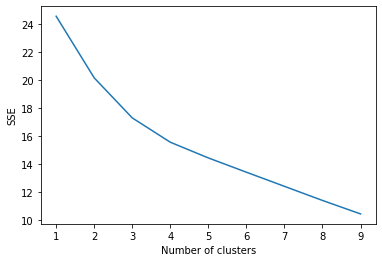

In [114]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
    nearby_business_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

<b>Use the optimal k value obtained from the above graph

In [115]:
#Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 3

nearby_business_grouped_clustering = nearby_business_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 1, 0, 2, 2, 0, 1, 2])

In [148]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
nearby_business_sorted.insert(0, 'Cluster Label', kmeans.labels_)

nearby_business_merged = nearby_business[['Venue']]
new_state_venues = state_venues[['Venue', 'Venue Latitude', 'Venue Longitude']]

nearby_business_merged = nearby_business_merged.join(new_state_venues.set_index('Venue'), on='Venue')

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nearby_business_merged = nearby_business_merged.join(nearby_business_sorted.set_index('Venue'), on='Venue')

nearby_business_merged.drop_duplicates(subset='Venue', keep='first', inplace=True)
nearby_business_merged

,Venue,Venue Latitude,Venue Longitude,Cluster Label,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
5,Mannar Fort,8.975699,79.917046,0,0,Fast Food Restaurant,Flea Market,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint,Buffet
15,Mullaitiv Beach,9.268846,80.819480,0,0,Sri Lankan Restaurant,Tourist Information Center,Bookstore,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
23,Mihinthale,8.357920,80.510516,1,1,Restaurant,Tourist Information Center,Bookstore,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
28,Anuradhapura Sacred City,8.353826,80.433035,1,1,Sri Lankan Restaurant,Hotel,Tourist Information Center,Bookstore,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
44,Fort Fredrick,8.575833,81.241297,0,0,Sporting Goods Shop,Cosmetics Shop,Tourist Information Center,Bookstore,Dumpling Restaurant,Diner,Dessert Shop,Coffee Shop,Café,Burger Joint
48,Uppuveli Beach,8.613682,81.218499,1,1,Hotel,Sri Lankan Restaurant,Seafood Restaurant,BBQ Joint,Café,Buffet,Tourist Information Center,Breakfast Spot,Diner,Dessert Shop
65,Nilaveli Beach,8.692907,81.190007,2,2,Hotel,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
72,Town Beach,8.570526,81.238139,0,0,Asian Restaurant,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
93,Pidurangala Rock,7.965583,80.761801,2,2,Hotel,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
107,Sigiriya Rock (සීගිරිය),7.957115,80.757347,1,1,RV Park,Bookstore,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint,Buffet


<h2>Visualize Clusters</h2>

In [151]:
#visualize the resulting clusters


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_business_merged['Venue Latitude'], nearby_business_merged['Venue Longitude'], nearby_business_merged['Venue'], nearby_business_merged['Cluster Labels']):
    if not math.isnan(cluster):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=0.7).add_to(map_clusters)
       
    
display(map_clusters)








<h2>Examine Clusters</h2>

Examine each cluster and determine the businesses that distinguish each cluster.

<b>Cluster 1

In [129]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 0, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
5,Mannar Fort,Fast Food Restaurant,Flea Market,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint,Buffet
15,Mullaitiv Beach,Sri Lankan Restaurant,Tourist Information Center,Bookstore,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
44,Fort Fredrick,Sporting Goods Shop,Cosmetics Shop,Tourist Information Center,Bookstore,Dumpling Restaurant,Diner,Dessert Shop,Coffee Shop,Café,Burger Joint
72,Town Beach,Asian Restaurant,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
117,Muthiyangana Raja Maha Viharaya,Diner,Asian Restaurant,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
122,9 Arch Bridge - Demodara,Café,Juice Bar,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Burger Joint
168,Kattankudy Beach,Fried Chicken Joint,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
189,Mahathma Gandhi Park,Tourist Information Center,Sri Lankan Restaurant,Restaurant,Market,Bookstore,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café
224,Keeramalai Pokuna,Bath House,Rest Area,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café
264,St. Clair's Falls Viewing Gallery,Indian Restaurant,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint


<b>Cluster 2

In [130]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 1, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
23,Mihinthale,Restaurant,Tourist Information Center,Bookstore,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
28,Anuradhapura Sacred City,Sri Lankan Restaurant,Hotel,Tourist Information Center,Bookstore,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
48,Uppuveli Beach,Hotel,Sri Lankan Restaurant,Seafood Restaurant,BBQ Joint,Café,Buffet,Tourist Information Center,Breakfast Spot,Diner,Dessert Shop
107,Sigiriya Rock (සීගිරිය),RV Park,Bookstore,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint,Buffet
113,Sigiryia Rock Fresco,RV Park,Bookstore,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint,Buffet
134,Kandy View Point,Hotel,Fast Food Restaurant,Sri Lankan Restaurant,Souvenir Shop,Food Court,Shopping Mall,Diner,Breakfast Spot,Dessert Shop,Cosmetics Shop
152,Royal Botanic Gardens,Hotel,Coffee Shop,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Café,Burger Joint
161,Orchid House - Royal Botanical Gardens,Hotel,Coffee Shop,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Café,Burger Joint
173,Passekudah Bay,Hotel,Restaurant,Tourist Information Center,Bookstore,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
179,Pasikudah,Hotel,Asian Restaurant,Restaurant,Tourist Information Center,Breakfast Spot,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café


<b>Cluster 3

In [131]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 2, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
65,Nilaveli Beach,Hotel,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
93,Pidurangala Rock,Hotel,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
131,Diyaluma Falls,Hotel,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
219,Dutch Fort,Hotel,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
292,Sri Lanka Kite,Hotel,Tourist Information Center,Breakfast Spot,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
298,Cocodance kitesurfing resort,Seafood Restaurant,Tourist Information Center,Bookstore,Dumpling Restaurant,Diner,Dessert Shop,Cosmetics Shop,Coffee Shop,Café,Burger Joint
313,Koggala Beach,Hotel,Seafood Restaurant,Airport,Indian Restaurant,Rest Area,Bookstore,Dessert Shop,Cosmetics Shop,Coffee Shop,Café
552,Indian Ocean,Seafood Restaurant,Hotel,Restaurant,Spa,BBQ Joint,Café,Indian Restaurant,Tourist Information Center,Breakfast Spot,Dessert Shop
685,Colombo Rowing Club,Coffee Shop,Hotel,Seafood Restaurant,Buffet,Tea Room,Restaurant,Italian Restaurant,Tourist Information Center,Breakfast Spot,Dessert Shop
